# supervised learning

- [1 - linear regression ](#1)
- [2 - logistic regression](#2)
- [3 - regularized logistic regression](#3)


<a name='1'></a>
## linear regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [52]:
a=[ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]

b=[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
         1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
         0.61705]

data=np.array(a),np.array(b)

In [53]:
x_train, y_train = data

In [54]:
#know about the data
print('type of x_train:', type(x_train))
print('shape of x_train:', x_train.shape)
print('first five elements of x_train are : \n' , x_train[:5])

print('\n')

print('type of y_train:', type(y_train))
print('shape of y_train:', y_train.shape)
print('first five elements of y_train are : \n' , y_train[:5])

type of x_train: <class 'numpy.ndarray'>
shape of x_train: (97,)
first five elements of x_train are : 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


type of y_train: <class 'numpy.ndarray'>
shape of y_train: (97,)
first five elements of y_train are : 
 [17.592   9.1302 13.662  11.854   6.8233]


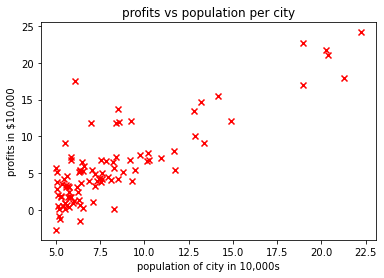

In [55]:
#visualize the data

plt.scatter(x_train,y_train,marker='x',c='r')

plt.title('profits vs population per city')
plt.ylabel('profits in $10,000')
plt.xlabel('population of city in 10,000s')
plt.show()


In [56]:
#compute cost

def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    cost=(x*w+b-y)**2
    cost_j=0
    
    for i in cost:
        cost_j = cost_j + i
    total_cost = cost_j/(2*m)
    
    return total_cost

initial_w = 2
initial_b = 1

cost = compute_cost(x_train,y_train,initial_w,initial_b)
print(f'cost at initial w: {cost:.3f}')

cost at initial w: 75.203


In [57]:
#gradient descent
def compute_gradient(x, y, w, b): 

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
        
    grd_db=w*x+b-y
    grd_db_sum=0

    for i in grd_db:
        grd_db_sum=grd_db_sum+i

    dj_db=grd_db_sum/m       

    grd_dw=(w*x+b-y)*x

    grd_dw_sum=0
    for i in grd_dw:
        grd_dw_sum=grd_dw_sum+i

    dj_dw=grd_dw_sum/m       
        
    return dj_dw, dj_db

initial_w = 0
initial_b = 0

tmp_dj_dw,tmp_dj_db = compute_gradient(x_train,y_train,initial_w,initial_b)

print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [58]:
#batch gradient descent

def gradient_descent(x,y,w_in,b_in, cost_function, gradient_function,alpha,num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function (x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost = cost_function(x,y,w,b)
            J_history.append(cost)
            
        if i%math.ceil(num_iters/10)==0:
            w_history.append(w)
            print(f'iteration {i:4} :cost {float(J_history[-1]):8.2f}')
            
    return w, b, J_history, w_history

In [59]:
initial_w=0.
initial_b=0.

iterations=1500
alpha=0.01

w,b,_,_ = gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)

print('w,b found by gradient descent:',w,b)

iteration    0 :cost     6.74
iteration  150 :cost     5.31
iteration  300 :cost     4.96
iteration  450 :cost     4.76
iteration  600 :cost     4.64
iteration  750 :cost     4.57
iteration  900 :cost     4.53
iteration 1050 :cost     4.51
iteration 1200 :cost     4.50
iteration 1350 :cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


Text(0.5, 0, 'population of city in 10,000')

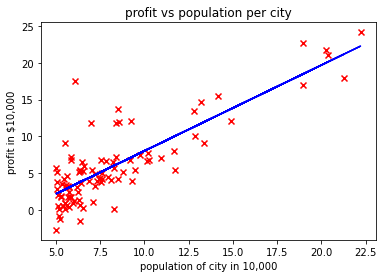

In [60]:
#plot the predict result

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
    
plt.plot(x_train,predicted,c='b')
plt.scatter(x_train,y_train,marker='x',c='r')

plt.title('profit vs population per city')
plt.ylabel('profit in $10,000')
#plt.xlabel('population of city in 10,000')

<a name='2'></a>
## logistic regression

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

/Users/10019653/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [113]:
with open('ex2data1.txt') as file:
    for line in file:
        ls = [l.split(',') for l in line]
        print(ls)


[['3'], ['4'], ['.'], ['6'], ['2'], ['3'], ['6'], ['5'], ['9'], ['6'], ['2'], ['4'], ['5'], ['1'], ['6'], ['9'], ['7'], ['', ''], ['7'], ['8'], ['.'], ['0'], ['2'], ['4'], ['6'], ['9'], ['2'], ['8'], ['1'], ['5'], ['3'], ['6'], ['2'], ['4'], ['', ''], ['0'], ['\n']]
[['3'], ['0'], ['.'], ['2'], ['8'], ['6'], ['7'], ['1'], ['0'], ['7'], ['6'], ['8'], ['2'], ['2'], ['6'], ['0'], ['7'], ['', ''], ['4'], ['3'], ['.'], ['8'], ['9'], ['4'], ['9'], ['9'], ['7'], ['5'], ['2'], ['4'], ['0'], ['0'], ['1'], ['0'], ['1'], ['', ''], ['0'], ['\n']]
[['3'], ['5'], ['.'], ['8'], ['4'], ['7'], ['4'], ['0'], ['8'], ['7'], ['6'], ['9'], ['9'], ['3'], ['8'], ['7'], ['2'], ['', ''], ['7'], ['2'], ['.'], ['9'], ['0'], ['2'], ['1'], ['9'], ['8'], ['0'], ['2'], ['7'], ['0'], ['8'], ['3'], ['6'], ['4'], ['', ''], ['0'], ['\n']]
[['6'], ['0'], ['.'], ['1'], ['8'], ['2'], ['5'], ['9'], ['9'], ['3'], ['8'], ['6'], ['2'], ['0'], ['9'], ['7'], ['6'], ['', ''], ['8'], ['6'], ['.'], ['3'], ['0'], ['8'], ['5'], ['5'],

In [102]:
with open('ex2data1.txt') as file:
    lines = [line.rstrip().split('\n') for line in file]
    
lines

[['34.62365962451697,78.0246928153624,0'],
 ['30.28671076822607,43.89499752400101,0'],
 ['35.84740876993872,72.90219802708364,0'],
 ['60.18259938620976,86.30855209546826,1'],
 ['79.0327360507101,75.3443764369103,1'],
 ['45.08327747668339,56.3163717815305,0'],
 ['61.10666453684766,96.51142588489624,1'],
 ['75.02474556738889,46.55401354116538,1'],
 ['76.09878670226257,87.42056971926803,1'],
 ['84.43281996120035,43.53339331072109,1'],
 ['95.86155507093572,38.22527805795094,0'],
 ['75.01365838958247,30.60326323428011,0'],
 ['82.30705337399482,76.48196330235604,1'],
 ['69.36458875970939,97.71869196188608,1'],
 ['39.53833914367223,76.03681085115882,0'],
 ['53.9710521485623,89.20735013750205,1'],
 ['69.07014406283025,52.74046973016765,1'],
 ['67.94685547711617,46.67857410673128,0'],
 ['70.66150955499435,92.92713789364831,1'],
 ['76.97878372747498,47.57596364975532,1'],
 ['67.37202754570876,42.83843832029179,0'],
 ['89.67677575072079,65.79936592745237,1'],
 ['50.534788289883,48.85581152764205,

In [109]:
lines[0]

['34.62365962451697,78.0246928153624,0']

In [84]:
with open('ex2data1.txt') as f:
    lines = f.readlines()

lines

['34.62365962451697,78.0246928153624,0\n',
 '30.28671076822607,43.89499752400101,0\n',
 '35.84740876993872,72.90219802708364,0\n',
 '60.18259938620976,86.30855209546826,1\n',
 '79.0327360507101,75.3443764369103,1\n',
 '45.08327747668339,56.3163717815305,0\n',
 '61.10666453684766,96.51142588489624,1\n',
 '75.02474556738889,46.55401354116538,1\n',
 '76.09878670226257,87.42056971926803,1\n',
 '84.43281996120035,43.53339331072109,1\n',
 '95.86155507093572,38.22527805795094,0\n',
 '75.01365838958247,30.60326323428011,0\n',
 '82.30705337399482,76.48196330235604,1\n',
 '69.36458875970939,97.71869196188608,1\n',
 '39.53833914367223,76.03681085115882,0\n',
 '53.9710521485623,89.20735013750205,1\n',
 '69.07014406283025,52.74046973016765,1\n',
 '67.94685547711617,46.67857410673128,0\n',
 '70.66150955499435,92.92713789364831,1\n',
 '76.97878372747498,47.57596364975532,1\n',
 '67.37202754570876,42.83843832029179,0\n',
 '89.67677575072079,65.79936592745237,1\n',
 '50.534788289883,48.85581152764205,0

In [96]:
a=[[34.62365962451697,78.0246928153624],
   [35.62365962451697,78.0246928153624],
   [36.62365962451697,78.0246928153624]
]

b=[0,1,2]

data=a,b
x_train,y_train=data
x_train

[[34.62365962451697, 78.0246928153624],
 [35.62365962451697, 78.0246928153624],
 [36.62365962451697, 78.0246928153624]]

In [89]:
a=([34.62365962451697,78.0246928153624],0,
   [34.62365962451697,78.0246928153624],0)
x_train,y_train = a

ValueError: too many values to unpack (expected 2)

In [88]:
y_train

[[34.62365962451697, 78.0246928153624], 0]

In [75]:
lines

['34.62365962451697,78.0246928153624,0\n',
 '30.28671076822607,43.89499752400101,0\n',
 '35.84740876993872,72.90219802708364,0\n',
 '60.18259938620976,86.30855209546826,1\n',
 '79.0327360507101,75.3443764369103,1\n',
 '45.08327747668339,56.3163717815305,0\n',
 '61.10666453684766,96.51142588489624,1\n',
 '75.02474556738889,46.55401354116538,1\n',
 '76.09878670226257,87.42056971926803,1\n',
 '84.43281996120035,43.53339331072109,1\n',
 '95.86155507093572,38.22527805795094,0\n',
 '75.01365838958247,30.60326323428011,0\n',
 '82.30705337399482,76.48196330235604,1\n',
 '69.36458875970939,97.71869196188608,1\n',
 '39.53833914367223,76.03681085115882,0\n',
 '53.9710521485623,89.20735013750205,1\n',
 '69.07014406283025,52.74046973016765,1\n',
 '67.94685547711617,46.67857410673128,0\n',
 '70.66150955499435,92.92713789364831,1\n',
 '76.97878372747498,47.57596364975532,1\n',
 '67.37202754570876,42.83843832029179,0\n',
 '89.67677575072079,65.79936592745237,1\n',
 '50.534788289883,48.85581152764205,0

In [71]:
with open('ex2data1.txt') as f:
    for line in f:
        print(line.strip())

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1
45.08327747668339,56.3163717815305,0
61.10666453684766,96.51142588489624,1
75.02474556738889,46.55401354116538,1
76.09878670226257,87.42056971926803,1
84.43281996120035,43.53339331072109,1
95.86155507093572,38.22527805795094,0
75.01365838958247,30.60326323428011,0
82.30705337399482,76.48196330235604,1
69.36458875970939,97.71869196188608,1
39.53833914367223,76.03681085115882,0
53.9710521485623,89.20735013750205,1
69.07014406283025,52.74046973016765,1
67.94685547711617,46.67857410673128,0
70.66150955499435,92.92713789364831,1
76.97878372747498,47.57596364975532,1
67.37202754570876,42.83843832029179,0
89.67677575072079,65.79936592745237,1
50.534788289883,48.85581152764205,0
34.21206097786789,44.20952859866288,0
77.9240914545704,68.9723599933059,1
62.27101367004632,69.95445795447587,1
80.1901807509566,44.8

In [65]:
x_train,y_train = pd.read_fwf('./ex2data1.txt')

ValueError: not enough values to unpack (expected 2, got 1)

<a name='3'></a>

## regularized logistic regression